## Importing Required Libraries

I begin by importing key libraries for data handling, visualization, and machine learning. These include pandas, seaborn, matplotlib, and scikit-learn modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Initial Data Exploration

I inspect the dataset structure to understand available features and identify categorical vs. numerical variables.

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


## Encoding Categorical Features

Machine learning models require numeric inputs. We apply Label Encoding to convert categorical columns like `sales_channel`, `trip_type`, `flight_day`, `route`, and `booking_origin` into integers.

In [4]:
cat_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [5]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## Defining Features and Target Variable

I define `booking_complete` as the target variable (`y`), which indicates whether a customer completed a booking. All other features are included in the input feature set (`X`).

In [6]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

## Splitting Data into Training and Testing Sets

I split the data into training and test sets using an 80/20 ratio. Stratification is applied to preserve the class distribution of `booking_complete`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Training the Predictive Model

I use a Random Forest Classifier to train the model. It is a robust ensemble method suitable for classification tasks with mixed feature types.

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

I evaluate model performance using classification metrics (precision, recall, f1-score) and visualize results via a confusion matrix.

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.56      0.10      0.18      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



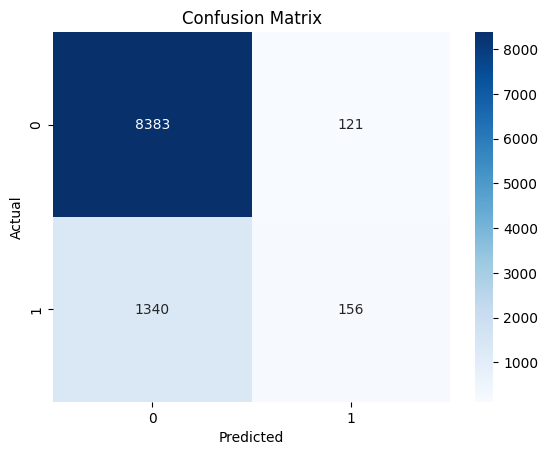

In [9]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance Analysis

I examine which features most influenced the model’s predictions. A bar chart highlights the top predictors of booking behavior, which can guide business strategy.

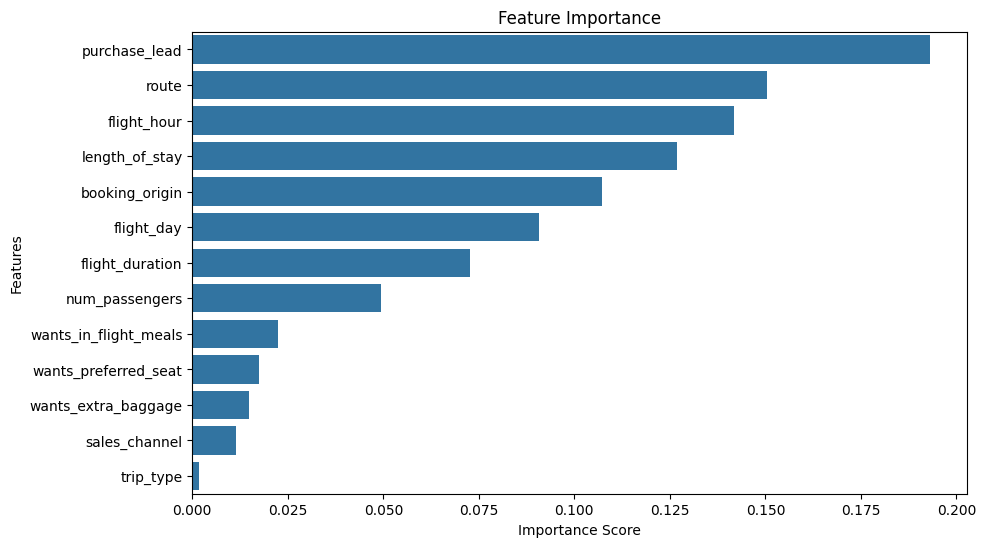

In [10]:
importances = model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Business Interpretation of Feature Importance

Understanding which features influence the booking decision is crucial for targeted marketing and customer engagement strategies.

### Key Insights:

- **Purchase Lead**: Customers who book well in advance are significantly more likely to complete their bookings. This suggests that proactive communication (e.g., email reminders or incentives) should target those browsing at shorter lead times.

- **Length of Stay**: Longer trips appear to correlate with higher booking completion. This indicates that holiday-focused travel may have higher conversion potential than short business trips.

- **Sales Channel**: Bookings through the Internet channel dominate the data and show stronger completion rates. This emphasizes the importance of digital experience optimization and funnel conversion improvements.

- **Wants Extra Baggage / In-flight Meals / Preferred Seat**: These optional services are strong signals of customer intent. Customers selecting ancillaries show higher likelihood to complete bookings. Targeting such users with dynamic packaging or personalized deals could drive additional conversions.

- **Flight Hour and Day of Week**: Timing patterns may indicate traveler segmentation (e.g., weekend leisure travelers vs. weekday business travelers). These patterns can inform scheduling and promotion strategies.

- **Route & Origin Country**: Geographic trends in booking behavior can help localize marketing efforts and allocate budget to high-conversion regions.

### Strategic Takeaway:

By focusing on key behavioral signals, like advance planning, ancillaries selection, and sales channel, British Airways can proactively target high-intent customers before they drop off. These insights can also shape loyalty programs, pricing strategy, and digital UX improvements.